### 테테전 

제가 '테란'회사의 기획자로서 '승리'라는 목표를 위해 지표를 통해 분석하겠습니다.
스타크래프트2 데이터를 기준으로 했지만, 승리하는 경우는 스타크래프트1과 일맥상통하니 진행하겠습니다.

필요한 라이브러리를 가져옵니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



데이터를 읽습니다.

In [2]:
data=pd.read_csv('./train.csv',encoding='cp949')
data.head()

C:\Users\Family\Miniconda3\envs\jupyter\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,game_id,winner,time,player,species,event,event_contents,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,0,1,0.00,0,T,Camera,"at (145.25, 21.5078125)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,0.00,1,T,Camera,"at (22.75, 147.0078125)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,1,0.02,0,T,Selection,['OrbitalCommand [3080001]'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1,0.02,0,T,Ability,(1360) - TrainSCV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1,0.14,0,T,Camera,"at (142.99609375, 24.50390625)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


필요한 데이터만 가져와 줍니다.

In [3]:
real_data=data.iloc[:,:7]
real_data

,game_id,winner,time,player,species,event,event_contents
0,0,1,0.00,0,T,Camera,"at (145.25, 21.5078125)"
1,0,1,0.00,1,T,Camera,"at (22.75, 147.0078125)"
2,0,1,0.02,0,T,Selection,['OrbitalCommand [3080001]']
3,0,1,0.02,0,T,Ability,(1360) - TrainSCV
4,0,1,0.14,0,T,Camera,"at (142.99609375, 24.50390625)"
...,...,...,...,...,...,...,...
1048570,604,1,1.11,0,Z,Right Click,"Location: (44.72607421875, 126.962890625, 49137)"
1048571,604,1,1.11,1,P,Camera,"at (143.53515625, 37.375)"
1048572,604,1,1.11,1,P,Camera,"at (143.53515625, 36.1953125)"
1048573,604,1,1.11,0,Z,Right Click,"Location: (44.466552734375, 126.853759765625, ..."


플레이어 1이 테란이면서,이긴게임을 분석하겠습니다.

먼저 테란이 이긴 유저 게임 번호입니다.

In [63]:
data_winner=real_data[real_data['winner']==1]
data_player=data_winner[data_winner['player']==1]
data_terran=data_player[data_player['species']=='T']
terran_a=len(data_terran['game_id'].unique())
terran_a

108

In [64]:
data_winner=real_data[real_data['winner']==0]
data_player=data_winner[data_winner['player']==0]
data_terran=data_player[data_player['species']=='T']
terran_b=len(data_terran['game_id'].unique())
terran_b

129

In [6]:
data_winner=real_data[real_data['winner']==1]
data_player=data_winner[data_winner['player']==1]
data_protoss=data_player[data_player['species']=='P']
protoss_a=len(data_protoss['game_id'].unique())

In [7]:
data_winner=real_data[real_data['winner']==1]
data_player=data_winner[data_winner['player']==1]
data_protoss=data_player[data_player['species']=='P']
protoss_b=len(data_protoss['game_id'].unique())

In [8]:
data_winner=real_data[real_data['winner']==1]
data_player=data_winner[data_winner['player']==1]
data_zerg=data_player[data_player['species']=='Z']
zerg_a=len(data_zerg['game_id'].unique())

In [9]:
data_winner=real_data[real_data['winner']==1]
data_player=data_winner[data_winner['player']==1]
data_zerg=data_player[data_player['species']=='Z']
zerg_b=len(data_zerg['game_id'].unique())

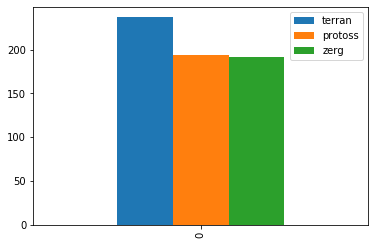

In [62]:
terran=terran_a+terran_b
protoss=protoss_a+protoss_b
zerg=zerg_a+zerg_b

df=pd.DataFrame({'terran':[terran],'protoss':[protoss],'zerg':[zerg]})
df.plot(kind='bar')

게임을 크게 terran vs terran, terran vs zerg , terran vs protoss 로 나누고  
많은 게임 중 각각 3개씩 랜덤으로 고르겠습니다.

In [68]:
import random

a=[]
for i in range(9):
    a.append(random.choice(data_terran['game_id'].unique()))
a

[194, 594, 577, 493, 136, 63, 72, 285, 193]

아래 8가지 event가 있습니다.

1. Ability : 생산, 공격 등 선수의 주요 행동

2. AddToControlGroup : 부대에 추가

3. Camera : 시점 선택

4. ControlGroup : 부대 행동

5. GetControlGroup : 부대 불러오기

6. Right Click : 마우스 우클릭

7. Selection : 객체 선택

8. SetControlGroup : 부대 지정

2,4,5,6,7,8 은 부대와 관련이 있고, 3은 시점, 1,6은 어느 행동과 관련이 있습니다.

저는 제일 중요한 ability만 분석해보겠습니다.

In [11]:
data_341=data_winner[data_winner['game_id']==341]
data_341

# terran terran 

,game_id,winner,time,player,species,event,event_contents
578919,341,1,0.00,0,T,Camera,"at (22.25, 81.5078125)"
578920,341,1,0.00,1,T,Camera,"at (135.25, 31.5078125)"
578921,341,1,0.01,1,T,Selection,['OrbitalCommand [3100001]']
578922,341,1,0.01,0,T,Selection,['OrbitalCommand [2DC0001]']
578923,341,1,0.01,1,T,Selection,['SCV [33C0001]']
...,...,...,...,...,...,...,...
580260,341,1,4.28,1,T,Camera,"at (37.578125, 84.609375)"
580261,341,1,4.28,1,T,Right Click,"Location: (57.8349609375, 97.33203125, 35068)"
580262,341,1,4.28,1,T,Camera,"at (38.8828125, 84.609375)"
580263,341,1,4.28,0,T,Ability,"(5A0) - Attack; Location: (35.612060546875, 86..."


In [69]:
data_341_ability=data_341[data_341['event']=='Ability']
data_341_ability

#ability 만 보기

,game_id,winner,time,player,species,event,event_contents
578978,341,1,0.12,1,T,Ability,(1360) - TrainSCV
578979,341,1,0.13,0,T,Ability,(1360) - TrainSCV
579037,341,1,0.25,1,T,Ability,"(1021) - BuildSupplyDepot; Location: (116.0, 3..."
579060,341,1,0.30,1,T,Ability,(1360) - TrainSCV
579065,341,1,0.32,0,T,Ability,(1360) - TrainSCV
...,...,...,...,...,...,...,...
580244,341,1,4.23,1,T,Ability,(5A0) - Attack; Target: Marine [03080002]; Loc...
580246,341,1,4.24,1,T,Ability,(5A0) - Attack; Target: Marine [03080002]; Loc...
580250,341,1,4.25,1,T,Ability,"(5A0) - Attack; Location: (34.876220703125, 91..."
580253,341,1,4.27,1,T,Ability,(5A0) - Attack; Target: SCV [02F40001]; Locati...


train csv가 많이 보입니다.  
일꾼 꾸준히 뽑아주는게 중요함을 알 수 있습니다.  

2분 4초 쯤부터 공격이 들어가고, 2분 48초부터 공격빈도가 높아집니다.  
2분부터 공격이 들어가는 타이밍이 있고, 이득을 취하면 계속 공격을 하는게 승리조건임을 알 수 있습니다.  

공격하는 중간에도 건물을 짓습니다.  
공격이 쉬지않고 들어가려면 테크트리를 올리는 것도 중요함을 알 수 있습니다.  

결론

이번 게임은 짧게 끝난 게임인데 테테전은 그만큼 초반에 이득을 보는게 중요하며, 공격이 제일 중요함을 알 수 있습니다. 

In [13]:
data_244=data_winner[data_winner['game_id']==244]
data_244

# terran terran

,game_id,winner,time,player,species,event,event_contents
412779,244,1,0.00,0,Z,Camera,"at (151.25, 20.5078125)"
412780,244,1,0.00,1,T,Camera,"at (24.75, 128.0078125)"
412781,244,1,0.01,1,T,Selection,['OrbitalCommand [3540001]']
412782,244,1,0.01,1,T,Ability,(1360) - TrainSCV
412783,244,1,0.01,0,Z,Selection,['Lair [3100001]']
...,...,...,...,...,...,...,...
414577,244,1,8.33,0,Z,Camera,"at (148.6875, 59.625)"
414578,244,1,8.33,0,Z,Camera,"at (148.6875, 56.4453125)"
414579,244,1,8.33,0,Z,Camera,"at (148.6875, 53.44140625)"
414580,244,1,8.33,0,Z,Camera,"at (148.6875, 46.19921875)"


In [14]:
data_244_terran=data_244[data_244['species']=='T']
data_244_ability=data_244_terran[data_244_terran['event']=='Ability']
data_244_ability

#ability 만 보기

,game_id,winner,time,player,species,event,event_contents
412782,244,1,0.01,1,T,Ability,(1360) - TrainSCV
412862,244,1,0.31,1,T,Ability,"(1021) - BuildSupplyDepot; Location: (30.0, 11..."
412878,244,1,0.48,1,T,Ability,"(1021) - BuildSupplyDepot; Location: (33.0, 11..."
412892,244,1,0.54,1,T,Ability,(1360) - TrainSCV
412900,244,1,1.07,1,T,Ability,"(1023) - BuildBarracks; Location: (32.5, 118.5..."
412926,244,1,1.15,1,T,Ability,(1360) - TrainSCV
412959,244,1,1.29,1,T,Ability,(1022) - BuildRefinery; Target: DestructibleSi...
413055,244,1,2.11,1,T,Ability,(13A0) - LowerSupplyDepot
413073,244,1,2.16,1,T,Ability,"(1020) - BuildCommandCenter; Location: (21.5, ..."
413099,244,1,2.20,1,T,Ability,(13E0) - TrainMarine


아까 사례와 비슷해보입니다. 이번 전략은 바이오닉과 메카닉을 합한 바카닉 전략인것 같습니다.  
또, 차이점은 중간에 커맨드센터를 짓는것입니다. 바카닉에 필요한 자원을 효과적으로 얻기위해 빠른 시간에 커맨드센터를 지었습니다.  
공격을 하지 않고, 이긴 걸로 보아 상황이 많이 기울어져 있으면 이기는 조건임을 알 수 있습니다.

결론 

게임에서 이기는 방법은 상황을 좋게하여 상대방으로 하여금 게임을 스스로 접는 상황도 있다는것을 알았습니다.  
상황을 좋게 하려면 자원을 효과적으로 얻어야 한다는 것을 알았습니다. 

In [15]:
data_11=data_winner[data_winner['game_id']==11]
data_11

# terran zerg

,game_id,winner,time,player,species,event,event_contents
20392,11,1,0.00,1,T,Camera,"at (22.75, 147.0078125)"
20393,11,1,0.00,0,Z,Camera,"at (145.25, 21.5078125)"
20394,11,1,0.01,0,Z,Selection,['Hive [3080001]']
20395,11,1,0.01,0,Z,Selection,"['Egg [30C0001]', 'Egg [3100001]', 'Egg [31400..."
20396,11,1,0.02,0,Z,Ability,(1820) - MorphDrone
...,...,...,...,...,...,...,...
22217,11,1,9.58,1,T,Camera,"at (29.84375, 130.62890625)"
22218,11,1,9.58,1,T,Camera,"at (29.84375, 129.734375)"
22219,11,1,9.58,1,T,Camera,"at (29.84375, 127.890625)"
22220,11,1,9.58,0,Z,Camera,"at (148.0, 79.7578125)"


In [16]:
data_11_terran=data_11[data_11['species']=='T']
data_11_ability=data_11_terran[data_11_terran['event']=='Ability']
data_11_ability

#ability 만 보기

,game_id,winner,time,player,species,event,event_contents
20406,11,1,0.06,1,T,Ability,(1360) - TrainSCV
20481,11,1,0.37,1,T,Ability,"(5A0) - Attack; Location: (113.580810546875, 1..."
20491,11,1,0.45,1,T,Ability,(1360) - TrainSCV
20534,11,1,1.15,1,T,Ability,(13A0) - LowerSupplyDepot
20549,11,1,1.20,1,T,Ability,(1022) - BuildRefinery; Target: CreepOnlyBlock...
20592,11,1,1.45,1,T,Ability,(1360) - TrainSCV
20661,11,1,2.20,1,T,Ability,(1022) - BuildRefinery; Target: CreepOnlyBlock...
20684,11,1,2.24,1,T,Ability,(13E0) - TrainMarine
20730,11,1,2.35,1,T,Ability,"(1026) - BuildBunker; Location: (26.5, 134.5, ..."
20831,11,1,3.00,1,T,Ability,(1360) - TrainSCV


여기서 viking은 골리앗, banshee는 레이스와 같다고 보면 됩니다.  
저그전 메카닉전략 같은데 비싼 메카닉을 빠른 자원확장으로 커버한것 같습니다.  
초반 벙커를 지은것도 저그는 운영과 올인의 전환이 부드럽기 때문에 그런것 같습니다.  
중 후반 터렛을 지은 것도 저그의 공중유닛을 막으려는 걸로 보인다.

결론 

저그전 메카닉 전략을 할 때, 자원이 부족할 수 있으므로 빠른 자원확장이 필요하고, 초반에 저그의 공격을 막아낼 벙커가 있어야함을 알 수 있습니다.

In [17]:
data_172=data_winner[data_winner['game_id']==172]
data_172

# terran zerg

,game_id,winner,time,player,species,event,event_contents
276372,172,1,0.00,1,T,Camera,"at (24.75, 137.0078125)"
276373,172,1,0.00,0,Z,Camera,"at (127.25, 27.5078125)"
276374,172,1,0.00,1,T,Selection,['OrbitalCommand [37C0001]']
276375,172,1,0.01,0,Z,Selection,"['Egg [33C0001]', 'Egg [3400001]', 'Egg [34400..."
276376,172,1,0.01,0,Z,Ability,(1820) - MorphDrone
...,...,...,...,...,...,...,...
280256,172,1,9.59,0,Z,Camera,"at (122.04296875, 41.8125)"
280257,172,1,9.59,0,Z,Camera,"at (122.04296875, 43.06640625)"
280258,172,1,9.59,1,T,Right Click,"Location: (137.434326171875, 59.662109375, 40943)"
280259,172,1,9.59,0,Z,Camera,"at (121.53125, 46.41796875)"


In [18]:
data_172_terran=data_172[data_172['species']=='T']
data_172_ability=data_172_terran[data_172_terran['event']=='Ability']
data_172_ability

,game_id,winner,time,player,species,event,event_contents
276512,172,1,0.24,1,T,Ability,"(1021) - BuildSupplyDepot; Location: (37.0, 12..."
276528,172,1,0.26,1,T,Ability,"(4C1) - Patrol; Location: (33.9619140625, 126...."
276575,172,1,0.32,1,T,Ability,(1360) - TrainSCV
276640,172,1,0.41,1,T,Ability,(1360) - TrainSCV
276662,172,1,0.43,1,T,Ability,(F80) - CancelLast
...,...,...,...,...,...,...,...
279980,172,1,9.11,1,T,Ability,(1446) - UpgradeTerranInfantryArmor1
280024,172,1,9.17,1,T,Ability,(1360) - TrainSCV
280081,172,1,9.27,1,T,Ability,"(1023) - BuildBarracks; Location: (31.5, 137.5..."
280133,172,1,9.34,1,T,Ability,(1022) - BuildRefinery; Target: DestructibleSi...


이번에도 저그전 메카닉전략입니다. 스타크래프트2에서는 메카닉이 정석인것 같습니다.  
눈에 띄는 것은 공격이 많습니다. 공격과 함께 location이 뜨는데 앞 숫자가 다른게 분명 저그의 멀티 지역과 본진 지역을 공격한것 같습니다. 
이번 공격에서는 본진과 멀티를 견제하는것이 중요함을 알 수 있습니다. 

결론

스타크래프트1에는 종족 간 상성이 있습니다. 저그는 테란에 종족 상성상 약하기 때문에 멀티를 필수적으로 가져가야 합니다.  
이를 막기위해 테란은 견제를 해야함을 알았습니다. 

In [19]:
data_451=data_winner[data_winner['game_id']==451]
data_451

# terran vs protoss 

,game_id,winner,time,player,species,event,event_contents
771176,451,1,0.00,1,T,Camera,"at (24.75, 128.0078125)"
771177,451,1,0.00,0,P,Camera,"at (151.25, 20.5078125)"
771178,451,1,0.01,0,P,Selection,['Nexus [3100001]']
771179,451,1,0.01,0,P,Ability,(15E0) - TrainProbe
771180,451,1,0.25,0,P,Camera,"at (120.6875, 82.5625)"
...,...,...,...,...,...,...,...
772060,451,1,10.12,0,P,Ability,"(1AC6) - TrainAdept; Location: (45.11328125, 1..."
772061,451,1,10.13,0,P,Right Click,"Location: (45.9072265625, 133.201416015625, 49..."
772062,451,1,10.14,1,T,Selection,['Barracks [3D00001]']
772063,451,1,10.14,0,P,Selection,"['Adept [4480008]', 'Adept [4800007]']"


In [20]:
data_451_terran=data_451[data_451['species']=='T']
data_451_ability=data_451_terran[data_451_terran['event']=='Ability']
data_451_ability

#ability 만 보기

,game_id,winner,time,player,species,event,event_contents
771225,451,1,1.07,1,T,Ability,"(1021) - BuildSupplyDepot; Location: (16.0, 13..."
771233,451,1,1.26,1,T,Ability,(1360) - TrainSCV
771270,451,1,2.48,1,T,Ability,"(1023) - BuildBarracks; Location: (32.5, 130.5..."
771285,451,1,3.04,1,T,Ability,(1360) - TrainSCV
771327,451,1,3.59,1,T,Ability,"(102A) - BuildFactory; Location: (31.5, 126.5,..."
771398,451,1,5.04,1,T,Ability,"(102B) - BuildStarport; Location: (35.5, 128.5..."
771403,451,1,5.14,1,T,Ability,"(1026) - BuildBunker; Location: (37.5, 119.5, ..."
771416,451,1,5.29,1,T,Ability,"(12A0) - BuildFactoryTechLab; Location: (31.5,..."
771426,451,1,5.46,1,T,Ability,(1261) - BuildBarracksReactor; Location: (32.5...
771468,451,1,6.08,1,T,Ability,(F61) - CancelSlot


프로토스전, 테크트리가 빠른 배럭1 팩토리 1 스타포트 1 전략을 사용했습니다.  
스타크래프트 1에는 게임 승리 지표를 자원, 건물, 병력으로 놓고 있습니다.  
그 중 건물의 점수가 높으면 높은 테크트리를 얻습니다. 하지만, 테크트리가 높으면 병력이 없거나 자원이 부족할 수 있습니다.  
이번 게임은 테크트리를 빠르게 올려 게임을 빠르게 이긴 것 같습니다. 공격이 없어서 분석하기 어렵지만, 
ability는 8분까지 이어지는데, time은 10분까지 합니다. 

결론 

저그전과 같이 상대방으로 하여금 좋은 상황을 만들게 되면 굳이 공격을 하지 않아도 이길 수 있습니다. 

In [21]:
data_592=data_winner[data_winner['game_id']==592]
data_592

# terran protoss

,game_id,winner,time,player,species,event,event_contents
1027453,592,1,0.00,1,T,Camera,"at (151.25, 20.5078125)"
1027454,592,1,0.00,0,P,Camera,"at (24.75, 128.0078125)"
1027455,592,1,0.01,1,T,Selection,['OrbitalCommand [3440001]']
1027456,592,1,0.01,1,T,Ability,(1360) - TrainSCV
1027457,592,1,0.02,1,T,SetControlGroup,NaN
...,...,...,...,...,...,...,...
1029659,592,1,9.58,0,P,Camera,"at (20.0, 107.46875)"
1029660,592,1,9.59,1,T,Selection,['Starport [45C0002]']
1029661,592,1,9.59,1,T,Selection,['Starport [47C0001]']
1029662,592,1,9.59,1,T,Camera,"at (142.25, 17.19140625)"


In [22]:
data_592_terran=data_592[data_592['species']=='T']
data_592_ability=data_592_terran[data_592_terran['event']=='Ability']
data_592_ability

#ability 만 보기

,game_id,winner,time,player,species,event,event_contents
1027456,592,1,0.01,1,T,Ability,(1360) - TrainSCV
1027539,592,1,0.26,1,T,Ability,"(1021) - BuildSupplyDepot; Location: (138.0, 4..."
1027544,592,1,0.31,1,T,Ability,(1360) - TrainSCV
1027609,592,1,1.04,1,T,Ability,"(1023) - BuildBarracks; Location: (140.5, 49.5..."
1027615,592,1,1.06,1,T,Ability,(1360) - TrainSCV
1027680,592,1,1.18,1,T,Ability,(1022) - BuildRefinery; Target: DestructibleSi...
1027733,592,1,1.35,1,T,Ability,(5A0) - Attack; Target: Probe [03340001]; Loca...
1027766,592,1,1.46,1,T,Ability,(1360) - TrainSCV
1027808,592,1,1.58,1,T,Ability,"(1021) - BuildSupplyDepot; Location: (145.0, 5..."
1027861,592,1,2.18,1,T,Ability,"(1023) - BuildBarracks; Location: (142.5, 52.5..."


신기한 점이 있었습니다. 초반에 배럭을 2개나 지었습니다. 자원적으로도 엄청난 손해 임을 알 수 있습니다.  
혹시 무슨 이유가 있었나 확인해봤습니다. 

In [23]:
data_592=data_winner[data_winner['game_id']==592]
data_592[data_592['species']=='P'][170:230]

,game_id,winner,time,player,species,event,event_contents
1027837,592,1,2.05,0,P,Ability,(15E0) - TrainProbe
1027838,592,1,2.06,0,P,Camera,"at (26.8203125, 127.03515625)"
1027839,592,1,2.06,0,P,Camera,"at (23.9296875, 123.70703125)"
1027841,592,1,2.07,0,P,Selection,['WarpGate [3980001]']
1027843,592,1,2.09,0,P,Selection,['Probe [3400001]']
1027844,592,1,2.09,0,P,Right Click,"Location: (28.29150390625, 123.041015625, 49136)"
1027845,592,1,2.10,0,P,Camera,"at (23.9296875, 123.50390625)"
1027846,592,1,2.10,0,P,Camera,"at (23.9296875, 122.3515625)"
1027850,592,1,2.13,0,P,Ability,(154E) - BuildCyberneticsCore; Location: (27.5...
1027854,592,1,2.14,0,P,Camera,"at (25.84765625, 119.71484375)"


2분 초반에 프로토스는 테란을 정찰한 것 같습니다. 테란은 프로토스에게 종족간 상성이 있기때문에 초반에 약합니다. 그걸 의식하고 배럭을 늘린 것 같습니다. 스타크래프트1에서도 프로브의 빠른 정찰은 전진게이트를 의심할 수 있고, 가스러쉬까지 당하면 배럭을 늘리는 선택을 할 수도 있습니다. 또, 미사일 터렛을 많이 지은걸로 봐서는 프로토스 공중유닛을 막기위해서 일 수 있다고 생각했습니다. 알아보니 5분쯤에 테란은 프로토스 진영을 정찰했습니다. 처음 프로토스 진영을 몰랐을 4분 말쯤에는 디텍터 기능이 있는 터렛을 미리 지었고, 확실히 정찰 후에 스캔과 터렛을 늘렸습니다. 

결론 

정찰은 중요함을 알았습니다. 혹시 몰라 배럭짓고, 혹시 몰라 터렛짓는 배제없는 플레이가 중요함을 알았습니다.


이번 간단한 분석을 통해 테프전 테란은 정찰이 중요하고, 상대방으로 하여금 좋은 상황을 만들어
굳이 공격을 하지 않아도 이길 수 있게 하는 것도 방법임을 알았습니다. 테저전 초반에는 벙커가 있어야 하고 
멀티 견제를 해야함을 알았습니다.테테전은 그만큼 초반에 이득을 보는게 중요하며, 공격이 제일 중요함을 알 수 있습니다.



In [8]:
import datetime as dt

def get_month(dt.date(split)) : return dt.date(x.year,x.month,1)

get_month('2020-12-01')

AttributeError: 'str' object has no attribute 'year'